In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Objective 

Because we consider the revenue a continuous variable, we call this a _regression_ problem. It is common to evaluate regression problems according to some deviation measure of the error (difference) between the predictions and the ground truth values. Typical choices are Mean Squared Error (MSE) and its square root, the Root Mean Squared Error (RMSE).

However, both of these measures are quite sensitive to extreme values and work best if the typical scale of prediction errors are consistent across the dataset. This is not likely to be the case here because the revenue variable varies a lot. This means that a, say 10%, prediction error would matter a lot more if it is for one of the higher-earning stores than for one of the lower-earning ones. Consequently, we will use a variation that takes a log transform of the target variable before computing prediction errors.

**TL;DR**: submissions for this problem will be evaluated according to the `Root Mean Squared Log Error` (RMSLE):

- $\text{RMSLE}(y, \hat{y}) = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\log(1 + \hat{y}_i) - \log(1 + y_i))^2}$

In the equation above, $y_i$ corresponds to the ground truth value for datapoint $i$, $\hat{y}_i$ corresponds to the predicted value for datapoint $i$, and $n$ denotes the total number of datapoints (dimensionality of $y$, $\hat{y}$). See the cell below for an implementation.



In [2]:
def rmsle(y_true, y_pred):
    """
    Computes the Root Mean Squared Logarithmic Error 
    
    Args:
        y_true (np.array): n-dimensional vector of ground-truth values 
        y_pred (np.array): n-dimensional vecotr of predicted values 
    
    Returns:
        A scalar float with the rmsle value 
    
    Note: You can alternatively use sklearn and just do: 
        `sklearn.metrics.mean_squared_log_error(y_true, y_pred) ** 0.5`
    """
    assert (y_true >= 0).all(), 'Received negative y_true values'
    assert (y_pred >= 0).all(), 'Received negative y_pred values'
    assert y_true.shape == y_pred.shape, 'y_true and y_pred have different shapes'
    y_true_log1p = np.log1p(y_true)  # log(1 + y_true)
    y_pred_log1p = np.log1p(y_pred)  # log(1 + y_pred)
    return np.sqrt(np.mean(np.square(y_pred_log1p - y_true_log1p)))

In [16]:
df1= pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/dataset_train_1.csv')
df2= pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/dataset_train_2.csv')





In [19]:

df3 = df1.set_index("store_id")
x_trian1 = df3.drop(["Unnamed: 0"], axis = 1)

df4 = df2.set_index("store_id")
x_train2 = df4.drop(["Unnamed: 0"], axis = 1)

x_train2

,grunnkrets_id_population_count,district_name_population_count,municipality_name_population_count,grunnkrets_name_num_kids,grunnkrets_name_num_kids+,grunnkrets_name_num_youths,grunnkrets_name_num_youthAdult,grunnkrets_name_num_adult,grunnkrets_name_num_adults+,grunnkrets_name_num_pensinors,...,distance_to_regionalt_knutepunkt,distance_to_annen_viktig_holdeplass,distance_to_nasjonalt_knutepunkt,number_of_all_stop_types,number_of_mangler_viktighetsnivå,number_of_standard_holdeplass,number_of_lokalt_knutepunkt,number_of_regionalt_knutepunkt,number_of_annen_viktig_holdeplass,number_of_nasjonalt_knutepunkt
store_id,,,,,,,,,,,,,,,,,,,,,
983540538-974187930-44774,157.0,4555.0,66910.0,7.0,11.0,5.0,29.0,32.0,51.0,22.0,...,0.016952,0.155313,0.294614,472,426,20,25,1,0,0
987074191-973117734-44755,NaN,5115.0,665566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001559,0.116319,0.020375,1044,922,25,74,13,0,10
984890265-981157303-64491,372.0,3427.0,29360.0,26.0,25.0,13.0,58.0,84.0,85.0,81.0,...,0.017330,0.054763,0.326362,222,140,58,12,5,7,0
914057442-992924179-126912,474.0,38006.0,48713.0,96.0,70.0,81.0,231.0,361.0,634.0,567.0,...,0.000522,5.257526,0.012352,148,107,9,21,9,0,2
913018583-913063538-668469,NaN,8298.0,186644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.644539,0.006737,0.319223,745,290,424,25,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915789943-915806929-781991,1516.0,38006.0,27143.0,887.0,694.0,604.0,1445.0,1999.0,4060.0,4192.0,...,0.005978,0.009062,0.176835,161,137,11,6,4,3,0
917921733-917982368-868081,503.0,38006.0,29695.0,21.0,11.0,6.0,91.0,116.0,140.0,118.0,...,0.051408,0.168095,0.333546,446,426,0,18,2,0,0
911721961-911764474-496764,1117.0,7091.0,51612.0,80.0,42.0,15.0,165.0,217.0,296.0,302.0,...,0.032679,0.037453,0.249433,477,425,0,13,15,24,0


# EDA analysis

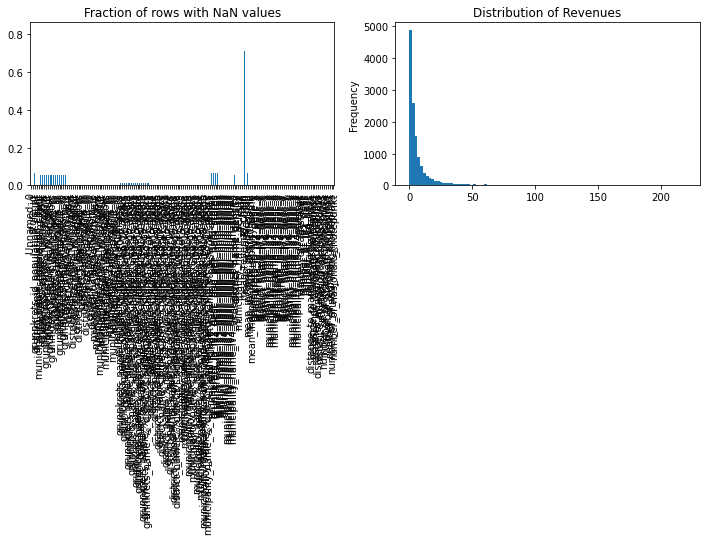

In [8]:

fig, (ax1, ax2) = plt.subplots(figsize=(12, 3), ncols=2)
x_train2.isna().mean().plot.bar(ax=ax1)
ax1.set_title('Fraction of rows with NaN values')
x_train2.revenue.plot.hist(bins=100, ax=ax2)
ax2.set_title('Distribution of Revenues');

,grunnkrets_id_population_count,district_name_population_count,municipality_name_population_count,grunnkrets_name_num_kids,grunnkrets_name_num_kids+,grunnkrets_name_num_youths,grunnkrets_name_num_youthAdult,grunnkrets_name_num_adult,grunnkrets_name_num_adults+,grunnkrets_name_num_pensinors,...,distance_to_regionalt_knutepunkt,distance_to_annen_viktig_holdeplass,distance_to_nasjonalt_knutepunkt,number_of_all_stop_types,number_of_mangler_viktighetsnivå,number_of_standard_holdeplass,number_of_lokalt_knutepunkt,number_of_regionalt_knutepunkt,number_of_annen_viktig_holdeplass,number_of_nasjonalt_knutepunkt
count,12038.000000,12827.000000,12829.000000,12150.000000,12150.000000,12150.000000,12150.000000,12150.000000,12150.000000,12150.000000,...,12859.000000,12859.000000,12859.000000,12859.000000,12859.000000,12859.000000,12859.000000,12859.000000,12859.000000,12859.000000
mean,765.350723,8278.618305,140942.167433,98.698025,79.268477,66.712428,153.795720,223.371770,425.898107,357.162634,...,0.164646,0.863666,0.246637,419.520958,336.698344,56.744226,16.646084,4.871996,1.986313,2.573995
std,632.880395,8820.732874,224531.487254,163.493152,130.261150,113.426373,251.952024,360.537774,712.964529,719.197401,...,0.388956,1.961501,0.288047,357.446005,314.703847,118.911362,21.448496,6.053781,4.034919,4.101151
min,61.000000,109.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000085,0.000150,0.000141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,325.000000,3095.500000,11349.000000,21.000000,17.000000,13.000000,42.000000,54.000000,112.000000,84.000000,...,0.009314,0.054872,0.027794,108.000000,72.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,586.000000,5159.000000,31900.000000,49.000000,37.000000,31.000000,83.000000,109.000000,222.000000,169.000000,...,0.035872,0.147917,0.144549,309.000000,246.000000,19.000000,7.000000,2.000000,0.000000,0.000000
75%,1011.500000,9287.000000,131835.000000,98.000000,80.000000,70.000000,157.000000,234.000000,404.000000,319.000000,...,0.151010,0.481111,0.344357,665.500000,497.000000,34.000000,21.000000,8.000000,2.000000,4.000000
max,5993.000000,38006.000000,665566.000000,887.000000,694.000000,604.000000,1445.000000,1999.000000,4060.000000,4192.000000,...,5.124140,9.505990,2.070691,1186.000000,1104.000000,601.000000,76.000000,36.000000,24.000000,21.000000
